In [1]:
# apply Jupyter notebook style
from IPython.core.display import HTML

from custom.styles import style_string

HTML(style_string)

<div style="text-align:center;">
  <img src="custom/molssi_main_horizontal.png" style="display: block; margin: 0 auto; max-height:200px;">
</div>


# Introduction to RDKit

<div class="overview admonition"> 
<p class="admonition-title">Overview</p>

Questions:

* What is RDKit?

* How can I get molecule information in Python?

* What is a molecular descriptor?

Objectives:

* Use RDKit to create molecules in Python

</div>

There are Python libraries that are made for working just with chemical data. One commonly used library in Python for data science (or cheminformatics) is called [RDKit](https://en.wikipedia.org/wiki/RDKit). RDKit is an open-source cheminformatics library, primarily developed in C++, and was created by [Dr. Greg Landrum](https://scholar.google.com/citations?user=xr9paY0AAAAJ&hl=en) in 2006. We will be using the Python interface to RDKit, though there are interfaces in other languages.

The primary goal of RDKit is to facilitate the manipulation of chemical structures, including reading and writing molecular file formats, calculating molecular properties, and performing substructure searches. In addition, it offers a wide range of cheminformatics algorithms such as molecular fingerprint generation, similarity metrics calculation, and molecular descriptor computation. This notebook introduces RDKit basis, but we will see more of all of these topics in later notebooks.

<div class="tip admonition"> 
<p class="admonition-title">Python Objects</p>

Most of this functionality is achieved through the RDKit `mol` object. In Python, we use the word "object" to refer to a variable type with associated data and methods. 
One example of an object we have seen in notebooks is a list - we could also call it a "list object". An object has `attributes` (data) and `methods`. 
You access information about objects with the syntax
```python
object.data
```
where data is the attribute name.

You acceess object methods with the syntax
```python
object.method(arguments)
```

For example, for a list "`append` is a method that was covered in the introductory lesson.

```
my_list = []
my_list.append(1) # "append" is a method
```
</div>    

In this lesson, we will create and manipulate RDKit `mol` objects. RDKit `mol` objects represent molecules and have
attributes (data) and methods (actions) associated with molecules.

We are going to use a part of RDKit called `Chem`. To use `Chem`, we first have to import it. 

In [2]:
from rdkit import Chem

## Creating Molecules with RDKit

To get information about molecules in RDKit, we have to first create objects representing molecules. RDKit has molecule object that can be used to retrieve information or calculate properties. To create a molecule object, we have to communicate the molecule identity in a way that computers understand. 

### Creating molecules using SMILES

In the last lesson, we learned about molecular representations using SMILES strings. Now we will use SMILES strings to create molecule objects in RDKIT. 

We can create a representation of methane using RDKit by using the `MolFromSmiles` function in `rdkit.Chem`.

In [3]:
methane = Chem.MolFromSmiles("C")

The `methane` variable is now an RDKit "molecule object".

In a Jupyter environment, putting a variable that is an RDKit molecule as the only or last thing in a cell,
will result in a picture of the molecule as an output.

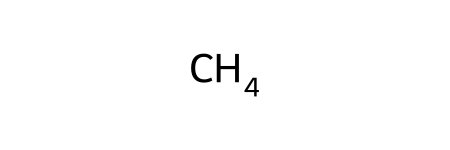

In [4]:
methane

<div class="exercise admonition">
<p class="admonition-title">Check Your Understanding</p>
<p> Create RDKit molecules for the following molecules. You can look up the SMILES strings on <a href="https://pubchem.ncbi.nlm.nih.gov/">PubChem</a>:
<p>
    <ul>
        <li> Propane
        <li> Ethene
        <li> Cyclohexane
        <li> Benzene
    </ul>
</p>
<p>Create variables for each molecule. The variable names should be the molecule name (all lowercase)</p>
</div>


In [6]:
# Your answers go here
propane = Chem.MolFromSmiles("CCC")
ethene = Chem.MolFromSmiles("C=C")
cyclohexane = Chem.MolFromSmiles("C1CCCCC1")
benzene = Chem.MolFromSmiles("c1ccccc1") # a lowercase c indicates an aromatic

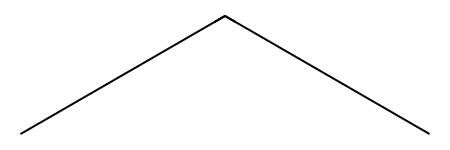

In [7]:
# Try visualizing your molecules here - you visualize a molecule as putting its variable name as the last thing in a cell
propane

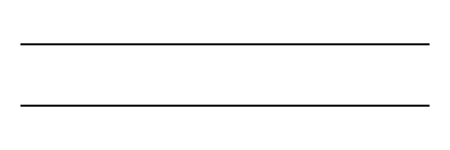

In [8]:
# Try visualizing your molecules here - you visualize a molecule as putting its variable name as the last thing in a cell
ethene

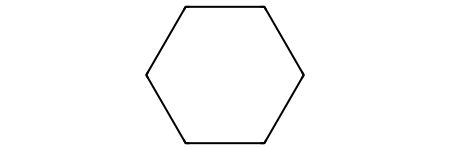

In [9]:
# Try visualizing your molecules here - you visualize a molecule as putting its variable name as the last thing in a cell
cyclohexane

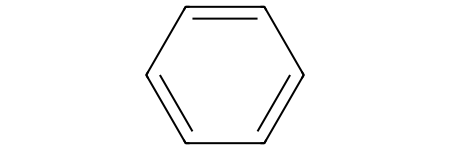

In [10]:
# Try visualizing your molecules here - you visualize a molecule as putting its variable name as the last thing in a cell
benzene

## RDKit and Molecular Properties

RDKit will allow us to access molecular properties of the molecules we've created.
For example, we can have RDKit tell us the number of atoms in a molecule using the `GetNumAtoms` methods.

In [11]:
num_methane = methane.GetNumAtoms()
print(f"The number of atoms in methane is {num_methane}")

The number of atoms in methane is 1


This isn't exactly what we expect. By default, RDKit only counts "heavy atoms". This means that hydrogen isn't included. We can tell RDKit to count hydrogens by adding `onlyExplicit=False` to our `GetNumAtoms` function.

In [12]:
num_methane_h = methane.GetNumAtoms(onlyExplicit=False)
print(f"The number of atoms in methane including hydrogens is {num_methane_h}.")

The number of atoms in methane including hydrogens is 5.


We can also get information about atoms or  bonds from RDKit molecules. We can use the `GetAtoms()` function, then use a loop to look at t`for` loop to look at the atoms. In the `for` loop, we can get information about each atom, like the atomic symbol or mass.

In [13]:
ethanol = Chem.MolFromSmiles("CCO")

for atom in ethanol.GetAtoms():
    print(atom.GetSymbol(), atom.GetMass())

C 12.011
C 12.011
O 15.999


Like the previous example, the molecule does not have hydrogens by default.
If you need to work with the hydrogens, you can use a function to add them called `AddHs`.
Now, when we look through the atoms, we get the hydrogens as well.

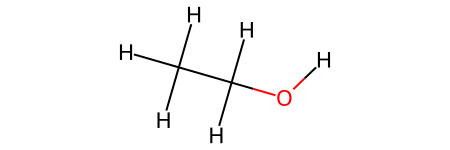

In [14]:
ethanol_h = Chem.AddHs(ethanol)

ethanol_h

In [15]:
for atom in ethanol_h.GetAtoms():
    print(atom.GetSymbol())

C
C
O
H
H
H
H
H
H


You can use the `GetBonds` method to get the bonds in a molecule.

In [16]:
for bond in ethanol.GetBonds():
    print(bond.GetBondType())

SINGLE
SINGLE


<div class="exercise admonition">
<p class="admonition-title">Check Your Understanding</p>
<p> Print atom and bond info for one or more of the molecules you created in the previous exercise. </p>
</div>

In [17]:
# print atom information for benzene

for atom in benzene.GetAtoms():
    print(atom.GetSymbol())

C
C
C
C
C
C


In [18]:
# print bond information for benzene
for bond in benzene.GetBonds():
    print(bond.GetBondType())

AROMATIC
AROMATIC
AROMATIC
AROMATIC
AROMATIC
AROMATIC


## RDKit and Molecular Descriptors

A molecular descriptor is a numerical value or a set of values that represent specific structural or chemical features of a molecule. Molecular descriptors are based on molecular structure and allow statistical analysis and similarity measurements on molecules.

RDKit supports the calculation of many molecular descriptors. You can see a [full list of RDKit descriptors](https://www.rdkit.org/docs/GettingStartedInPython.html#list-of-available-descriptors) or [see the module documentation](https://www.rdkit.org/docs/source/rdkit.Chem.Descriptors.html).

To get molecular descriptors from RDKit, we import the `Descriptors` module.

```python
from rdkit.Chem import Descriptors
```

To get a descriptor, you do

```python
Descriptors.descriptor_name(molecule_variable)

```

RDKit supports a number of molecular descriptors, a list of which is given below, along with the RDKit method for the property.


Name of Property      | Name of RDKit Descriptor Function
----------------------|-----------------------------------|
molecular weight      | Descriptors.MolWt
number of heavy atoms | Descriptors.HeavyAtomCount
number of H-bond donors| Descriptors.NumHDonors
number of H-bond donors| Descriptors.NumHAcceptors
octanol-water partition coefficient| Descriptors.MolLogP
topological polar surface area | Descriptors.TPSA
number of rotatable bonds      | Descriptors.NumRotatableBonds
number of aromatic rings       | Descriptors.NumAromaticRings
number of aliphatic rings      | Descriptors.NumAliphaticRings



In [19]:
from rdkit.Chem import Descriptors

In [20]:
print("Printing info for methane:")
print(f"The molecular weight is {Descriptors.MolWt(methane)}")
print(f"The number of aromatic rings is {Descriptors.NumAromaticRings(methane)}")


Printing info for methane:
The molecular weight is 16.043
The number of aromatic rings is 0


<div class="exercise admonition">
<p class="admonition-title">Check Your Understanding</p>
    <p> Print molecular descriptors for some of the molecules you've created</p>
</div>


In [21]:
print(f"The molecular weight is {Descriptors.MolWt(benzene)}")
print(f"The number of aromatic rings is {Descriptors.NumAromaticRings(benzene)}")
print(f"The topological polar surface area is {Descriptors.TPSA(benzene)}")

The molecular weight is 78.11399999999999
The number of aromatic rings is 1
The topological polar surface area is 0.0


## RDKit and Stereochemistry

RDKit can be used to find chiral centers and print stereochemistry information about molecules. Consider 2-chlorobutane, created below.
We are using a canonical SMILES which does not include stereo center information.

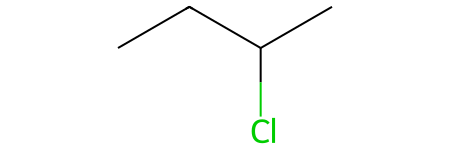

In [22]:
chlorobutane = Chem.MolFromSmiles("CCC(C)Cl")
chlorobutane

However, RDKit can analyze the molecule and tell us about the number of chiral centers.

In [23]:
# Can tell us how many stereocenters
Chem.rdMolDescriptors.CalcNumAtomStereoCenters(chlorobutane)

1

We can also retrieve the atom indices of the chiral centers and see their orientation.
If the orientation was not specified, RDKit will list it as `?`. 
We also have to tell RDKit to tell us about unassigned chiral centers using
`includeUnassigned=True`.
"Unassigned" refers to the fact that we have not specified the stereochemistry.

We can get the atom index of the stereocenter using `FindMolChiralCenters`.

In [24]:
# Can tell us the atom number and the orientation.
Chem.FindMolChiralCenters(chlorobutane, includeUnassigned=True)

[(2, '?')]

### Visualizing Chiral Centers

Although we can visualize molecules by making them the last thing in a cell, RDKit also allows us to make more complicated visualizations using its
`Draw` module. To make the same visualization we did earlier we could do the following

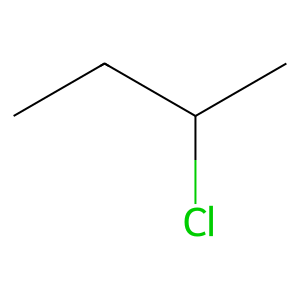

In [25]:
from rdkit.Chem import Draw

Draw.MolToImage(chlorobutane)

The `MolToImage` function can be used to highlight particular atoms. 
To highlight the chiral center in this molecule, we might first use
`Chem.FindMolChiralCenters` to get the index of the chiral centers,
then pass the atom indices of the chiral centers into `MolToImage`, as shown below.

[(2, '?')]


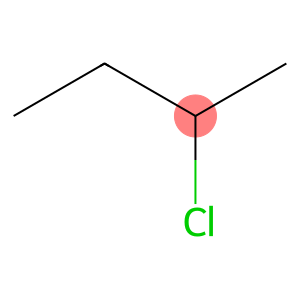

In [26]:
chiral_centers = Chem.FindMolChiralCenters(chlorobutane, includeUnassigned=True)
print(chiral_centers)

# We use 2 because that is the index of the chiral center.
Draw.MolToImage(chlorobutane, highlightAtoms=[2])

We could have also used Python instead of filling in the number.
A `for` loop would make this more transferable between different atoms (hint for the next exercise!)

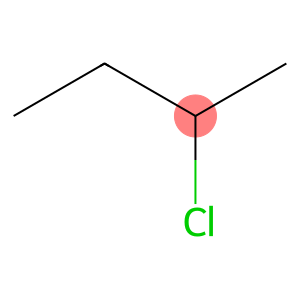

In [27]:
chiral_centers = Chem.FindMolChiralCenters(chlorobutane, includeUnassigned=True)

chiral_indices = []

for center in chiral_centers:
    chiral_indices.append(center[0])

Draw.MolToImage(chlorobutane, highlightAtoms=chiral_indices)

<div class="exercise admonition">
<p class="admonition-title">Exercise</p>
    <p> Create a molecule using the SMILES string C1[C@@H](Cl)[C@H](Cl)CCC1. Print the stereochemistry information and
        create a visualization highlighting the stereocenters.</p>
</div>

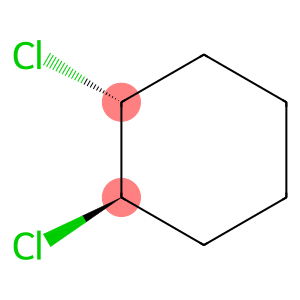

In [29]:
exercise_molecule = Chem.MolFromSmiles("C1[C@@H](Cl)[C@H](Cl)CCC1")

chiral_centers = Chem.FindMolChiralCenters(exercise_molecule, includeUnassigned=True)

chiral_indices = []

for center in chiral_centers:
    chiral_indices.append(center[0])

Draw.MolToImage(exercise_molecule, highlightAtoms=chiral_indices)


## RDKit and Molecular Similarity

### Substructure Searches

RDKit can be used to search molecules for substructures. 
You can define your own substructures using SMILES. 
For example, we'll first look for carbons in caffeine.

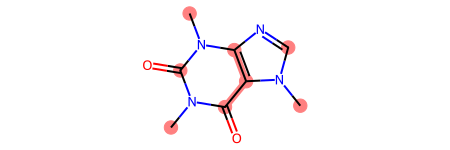

In [30]:
caffeine = Chem.MolFromSmiles('CN1C=NC2=C1C(=O)N(C(=O)N2C)C')
carbon = Chem.MolFromSmiles('C')

matches = caffeine.GetSubstructMatches(carbon)

caffeine

In this example, you can see that all of the carbons are highlighted. 

The code `matches = caffeine.GetSubstructMatches(carbon)` will highlight all of the carbons in the caffeine molecule because it is searching for a specific substructure, which in this case is just a single carbon atom.

But, what if we just wanted to highlight the methyl groups? We would have to use a different strategy for substructure matching.

#### SMARTS Strings
A [SMARTS (SMiles ARbitrary Target Specification)](https://en.wikipedia.org/wiki/SMILES_arbitrary_target_specification) string is a pattern-matching language for specifying substructures in molecules. It is similar to SMILES but has additional features for specifying atom and bond properties. In contrast to SMILES, SMARTS allows for specifying substructures based on patterns of atoms and bonds, rather than just specifying the exact arrangement of atoms and bonds in a molecule.

In this case, we want to highlight the methyl group in caffeine, which contains a single carbon atom bonded to three hydrogen atoms. We can use a SMARTS string to define this substructure as `[CH3]`, which represents a carbon atom with three hydrogen atoms bonded to it.

Using a SMARTS string is necessary in this case because simply searching for a single carbon atom with the code `carbon = Chem.MolFromSmiles('C')` would highlight all carbons in the molecule, not just the methyl group. By using a SMARTS string, we can specify the exact substructure we want to highlight and avoid highlighting unintended parts of the molecule.

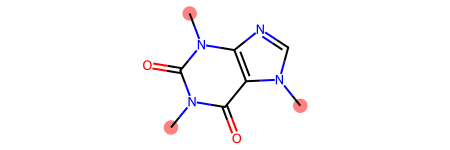

In [31]:
caffeine = Chem.MolFromSmiles('CN1C=NC2=C1C(=O)N(C(=O)N2C)C')
methyl_pattern = Chem.MolFromSmarts('[CH3]')

# Get the indices of the matching atoms
matches = caffeine.GetSubstructMatches(methyl_pattern)
caffeine

You can see a list of SMARTS strings for different functional groups [at this link](https://www.daylight.com/dayhtml_tutorials/languages/smarts/smarts_examples.html).

<div class="exercise admonition">
<p class="admonition-title">Exercise</p>
    <p>Create an RDKit molecule object for aspirin (acetylsalicylic acid) using its SMILES string "CC(=O)OC1=CC=CC=C1C(=O)O".</p>
    <p>Visualize the molecule, highlighting any carboxyl groups (COOH) in the structure. Use a SMARTS string to define the carboxyl group substructure.</p>
</div>

In [32]:
aspirin = Chem.MolFromSmiles("CC(=O)OC1=CC=CC=C1C(=O)O")
carboxyl_smarts = Chem.MolFromSmarts("[CX3]=[OX1]")

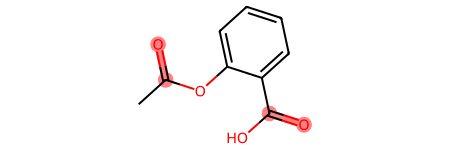

In [34]:
matches = aspirin.GetSubstructMatches(carboxyl_smarts)
aspirin

## Molecular Fingerprints

Molecular fingerprinting is a method that represents the structure of a molecule in a way so that molecules may be compared. There are numerous molecular fingerprint algorithms that you might choose, each with their own strengths and weaknesses. You can see more information on fingerprinting in RDKit in [this presentation](https://www.rdkit.org/UGM/2012/Landrum_RDKit_UGM.Fingerprints.Final.pptx.pdf) or in the [RDKit documentation](https://www.rdkit.org/docs/GettingStartedInPython.html#fingerprinting-and-molecular-similarity).

Let's see how we might use RDKit to compare some molecules using fingerprints.
We already have aspirin defined. We will also create a molecule for salicylic acid and one for acetaminophen.
Aspirin is derived from salicylic acid, so we would expect the structures to be similar.
Acetaminophen is another molecule that is used as a pain reliever.

In [35]:
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import Draw

salicylic_acid_smiles = " C1=CC=C(C(=C1)C(=O)O)O"
aspirin_smiles = "CC(=O)OC1=CC=CC=C1C(=O)O"
acetaminophen_smiles = "CC(=O)NC1=CC=C(C=C1)O"

aspirin = Chem.MolFromSmiles(aspirin_smiles)
salicylic_acid = Chem.MolFromSmiles(salicylic_acid_smiles)
acetaminophen = Chem.MolFromSmiles(acetaminophen_smiles)



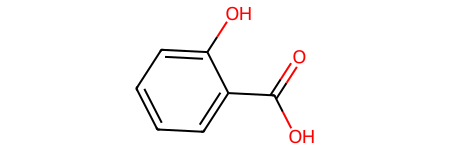

In [36]:
salicylic_acid

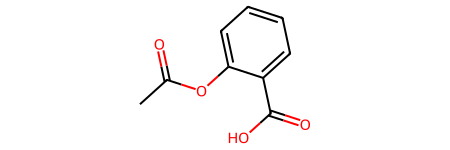

In [37]:
aspirin

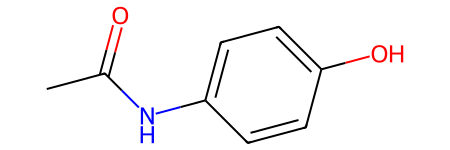

In [38]:
acetaminophen

From inspecting these molecules visually, we can see that aspirin and salicylic acid look more similar than aspirin and acetaminophen. 
We will see this next using a molecular fingerprint.

We will use the `Chem.RDKFingerprint`, which is an RDKit specific fingerprint, though there are other options.

In [39]:
acetaminophen_fp = Chem.RDKFingerprint(acetaminophen)
aspirin_fp = Chem.RDKFingerprint(aspirin)
salicylic_acid_fp = Chem.RDKFingerprint(salicylic_acid)


To calculate the similarity between molecular fingerprints, a measure called the Tanimoto similarity is often used. 
This number ranges from 0 to 1.
A higher number means that molecules are more similar. For example, the similarity of a molecule with itself would be 1.

In [40]:
similarity = DataStructs.TanimotoSimilarity(aspirin_fp, salicylic_acid_fp)
print(similarity)

0.5621468926553672


In [41]:
similarity = DataStructs.TanimotoSimilarity(aspirin_fp, acetaminophen_fp)
print(similarity)

0.15486725663716813


As expected, our similarity scores indicate that aspirin and salicylic acid are more similar than aspirin and acetaminophen. 
This starts being more useful when working with larger data sets.

<div class="exercise admonition">
<p class="admonition-title">Final Challenge</p>

<p> For the following sets of molecules, generate the RDKit molecule using a SMILES string (you can find this on PubChem).
    Identify which molecules contain an amine group and which contain a phenyl group. Finally, use fingerprints to compute
    the similarity between a few of the molecules.</p>

<ul>
<li>Neurotransmitters:</li>
    <ul>
        <li> Dopamine </li>
        <li> Serotonin </li>
        <li> Norephinephrine </li>
    </ul>
<li>Hormones:</li>
    <ul>
        <li> Cortisol </li>
        <li> Testosterone </li>
        <li> Estradiol </li>
    </ul>
<ul>

</div>




In [42]:
molecule_names = ["dopamine", "seratonin", "norephinephrine", "cortisol"]
molecule_smiles = ["C1=CC(=C(C=C1CCN)O)O", 
                   "C1=CC2=C(C=C1O)C(=CN2)CCN", 
                   "C1=CC(=C(C=C1C(CN)O)O)O",
                   "CC12CCC(=O)C=C1CCC3C2C(CC4(C3CCC4(C(=O)CO)O)C)O"
                  ]
amine_pattern = Chem.MolFromSmarts("[NX3;H2,H1;!$(NC=O)]")
phenyl_pattern = Chem.MolFromSmarts("c1ccccc1")

num_molecules = len(molecule_names)

mol_objects = []

for i in range(num_molecules):
    
    mol_object = Chem.MolFromSmiles(molecule_smiles[i])
    mol_objects.append(mol_object)
    
    amine_matches = mol_object.GetSubstructMatches(amine_pattern)
    phenyl_matches = mol_object.GetSubstructMatches(phenyl_pattern)
    
    if len(amine_matches) > 0:
        print(f"Amine found in {molecule_names[i]}")
        
    if len(phenyl_matches) > 0:
        print(f"Phenyl found in {molecule_names[i]}")

Amine found in dopamine
Phenyl found in dopamine
Amine found in seratonin
Phenyl found in seratonin
Amine found in norephinephrine
Phenyl found in norephinephrine
